In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# v2 removes the spectra and adds the minimization


In [3]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma

In [4]:
with open('../TLee_Np0p/chi2_and_chi2min_15_5_data_and_toys.txt', 'r') as f:
    lines = f.readlines()

data_15_5_chi2_value = -999
data_15_5_chi2_min_value = -999
data_15_5_dchi2_value = -999

toy_1_1_15_5_chi2_values = []
toy_1_1_15_5_chi2_min_values = []
toy_1_1_15_5_dchi2_values = []

toy_15_5_15_5_chi2_values = []
toy_15_5_15_5_chi2_min_values = []
toy_15_5_15_5_dchi2_values = []

for line in lines:

    # check what the string starts with

    if line.startswith("data vs (15, 5) chi2 = "):
        data_15_5_chi2_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) chi2_min = "):
        data_15_5_chi2_min_value = float(line.split()[-1])
    elif line.startswith("data vs (15, 5) dchi2 = "):
        data_15_5_dchi2_value = float(line.split()[-1])

    elif line.startswith("(1, 1) toy vs (15, 5) chi2 = "):
        toy_1_1_15_5_chi2_values.append(float(line.split()[-1]))
    elif line.startswith("(1, 1) toy vs (15, 5) chi2_min = "):
        toy_1_1_15_5_chi2_min_values.append(float(line.split()[-1]))
    elif line.startswith("(1, 1) toy vs (15, 5) dchi2 = "):
        toy_1_1_15_5_dchi2_values.append(float(line.split()[-1]))

    elif line.startswith("(15, 5) toy vs (15, 5) chi2 = "):
        toy_15_5_15_5_chi2_values.append(float(line.split()[-1]))
    elif line.startswith("(15, 5) toy vs (15, 5) chi2_min = "):
        toy_15_5_15_5_chi2_min_values.append(float(line.split()[-1]))
    elif line.startswith("(15, 5) toy vs (15, 5) dchi2 = "):
        toy_15_5_15_5_dchi2_values.append(float(line.split()[-1]))
        
print(f"data_15_5_chi2_value: {data_15_5_chi2_value}")
print(f"data_15_5_chi2_min_value: {data_15_5_chi2_min_value}")
print(f"data_15_5_dchi2_value: {data_15_5_dchi2_value}")

print("\nlen(toy_1_1_15_5_chi2_values):", len(toy_1_1_15_5_chi2_values))
print("len(toy_1_1_15_5_chi2_min_values):", len(toy_1_1_15_5_chi2_min_values))
print("len(toy_1_1_15_5_dchi2_values):", len(toy_1_1_15_5_dchi2_values))

print("\nlen(toy_15_5_15_5_chi2_values):", len(toy_15_5_15_5_chi2_values))
print("len(toy_15_5_15_5_chi2_min_values):", len(toy_15_5_15_5_chi2_min_values))
print("len(toy_15_5_15_5_dchi2_values):", len(toy_15_5_15_5_dchi2_values))

data_15_5_chi2_value: 50.9965
data_15_5_chi2_min_value: 44.81
data_15_5_dchi2_value: 6.1865

len(toy_1_1_15_5_chi2_values): 1000
len(toy_1_1_15_5_chi2_min_values): 1000
len(toy_1_1_15_5_dchi2_values): 1000

len(toy_15_5_15_5_chi2_values): 1000
len(toy_15_5_15_5_chi2_min_values): 1000
len(toy_15_5_15_5_dchi2_values): 1000


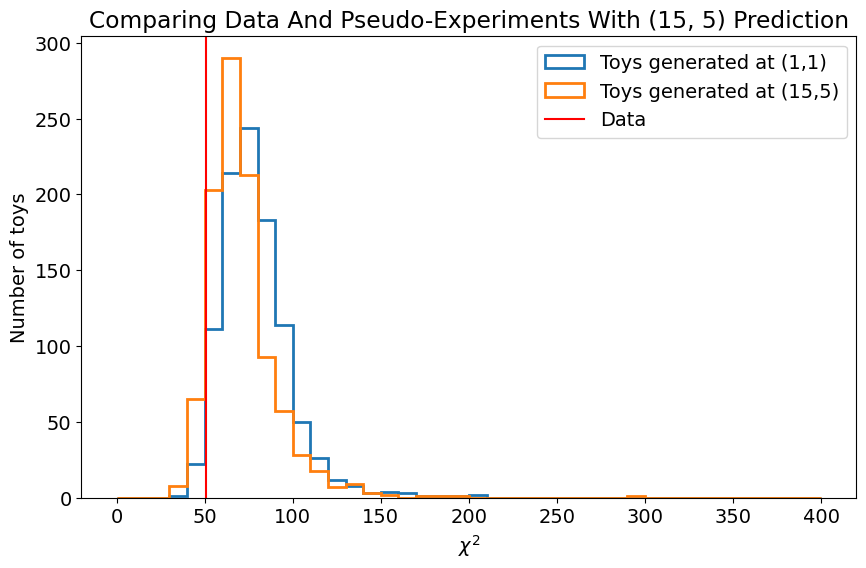

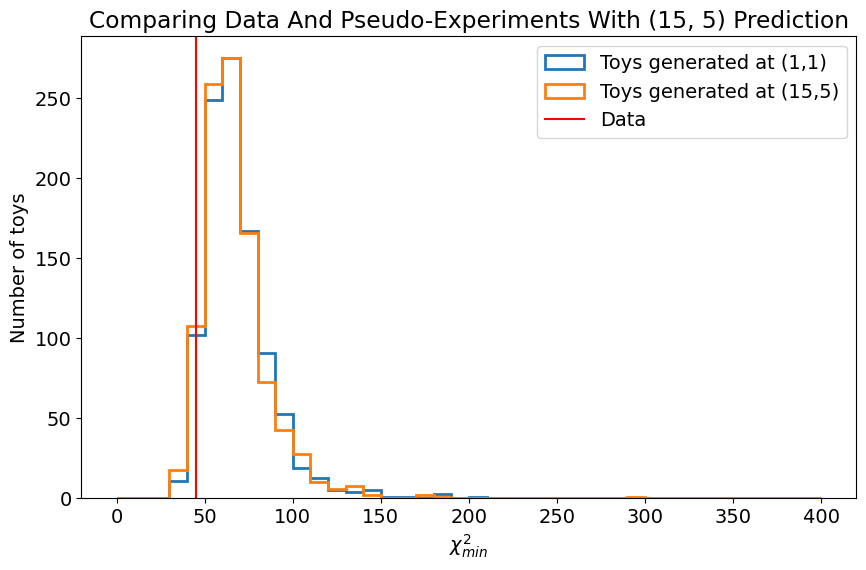

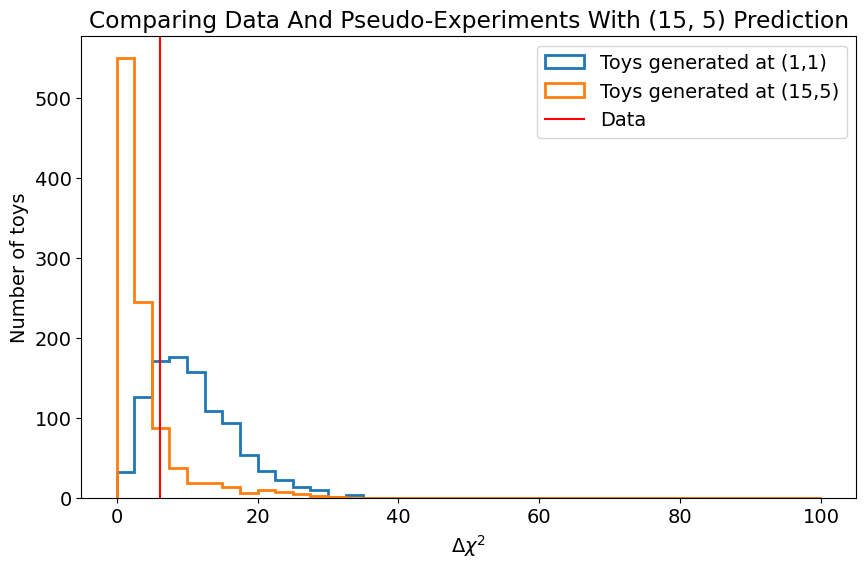

In [5]:
bins = np.linspace(0, 400, 41)

plt.rcParams.update({'font.size': 14})
lw = 2

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'$\chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_chi2_min_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_chi2_min_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'$\chi^2_{min}$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()

bins = np.linspace(0, 100, 41)

plt.figure(figsize=(10, 6))
plt.hist(toy_1_1_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (1,1)')
plt.hist(toy_15_5_15_5_dchi2_values, bins=bins, histtype='step', lw=lw, label='Toys generated at (15,5)')
plt.axvline(data_15_5_dchi2_value, color='r', label='Data')
plt.legend()
plt.xlabel(r'$\Delta \chi^2$')
plt.ylabel('Number of toys')
plt.title("Comparing Data And Pseudo-Experiments With (15, 5) Prediction")
plt.show()
